In [1]:
!pip install librosa scikit-learn matplotlib seaborn


In [2]:
import librosa
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
def load_audio_files(folder):
    audio_data = []
    labels = []
    for label in ['cat', 'dog']:
        path = os.path.join(folder, label)
        for file in os.listdir(path):
            file_path = os.path.join(path, file)
            data, _ = librosa.load(file_path, sr=None)
            audio_data.append(data)
            labels.append(label)
    return audio_data, labels
train_folder = '/content/drive/MyDrive/CMPE255_Assignment6/I/cats_dogs/train'
audio_data, labels = load_audio_files(train_folder)


In [5]:
def generate_embeddings(audio_data):
    embeddings = [librosa.feature.mfcc(y=audio).mean(axis=1) for audio in audio_data]
    return np.array(embeddings)
embeddings = generate_embeddings(audio_data)


In [12]:
kmeans = KMeans(n_clusters=2, random_state=921)
clusters = kmeans.fit_predict(embeddings)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


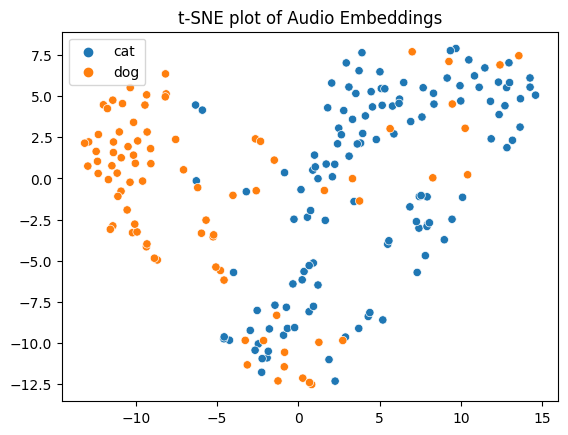

In [15]:
tsne = TSNE(n_components=2, random_state=921)
tsne_results = tsne.fit_transform(embeddings)

sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=labels)
plt.title('t-SNE plot of Audio Embeddings')
plt.show()


In [16]:
score = silhouette_score(embeddings, clusters)
print('Silhouette Score:', score)


Silhouette Score: 0.2643357
